<a href="https://www.kaggle.com/code/mohamedchahed/glasses-no-glasses-that-is-the-question?scriptVersionId=125088245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔬 Overview

👀 Object detection is an important task in computer vision that involves identifying and localizing objects of interest in images or videos. 💻 YOLOv5 is a state-of-the-art object detection algorithm that has gained popularity in recent years due to its speed, accuracy, and simplicity. In this 🤩 project, we aim to use YOLOv5 to detect two classes of objects - faces with 👓 and without 👓.

# Data Collection: Gathering Images 🖼️📷

For the data collection step, I used the Unsplash API to gather a large set of face images with and without glasses. 📷 I obtained permission from Unsplash to use their API for this purpose. ✔️ The API allowed me to easily search for and download high-quality images that met my criteria. 🔎 I then curated the dataset by manually filtering out any irrelevant images. 

The final dataset consists of a set of face images with and without glasses, and is now available on Kaggle for anyone to use. 

## Data Labeling Process 🏷️📝

For the data labeling process, I used a website called makesense.ai. 🖥️ This website provides a free platform for labeling images for object detection in YOLO format. With this tool, I was able to upload my set of face images and manually annotate each image with the presence or absence of glasses. 👓 The tool generated a .txt file for each image with the corresponding annotations. 📄

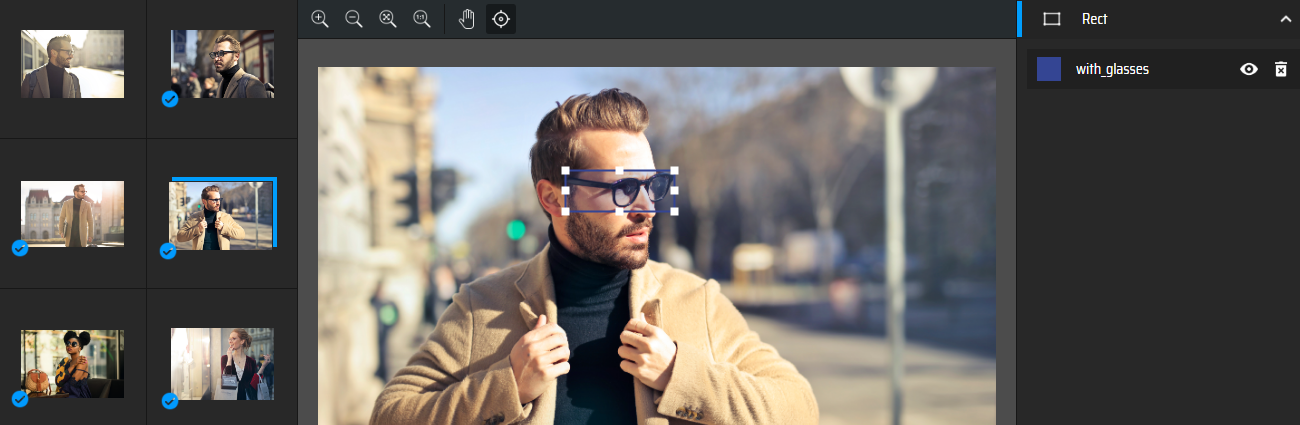

# Training The Model Using Ultralytics YOLOv5   🚀

To train my glasses detection model, I followed the steps provided in the YOLOv5 GitHub Wiki. 📚 These steps included setting up the environment, preparing the dataset and annotations, and configuring the training parameters. I used the YOLOv5 implementation by Ultralytics, which provided me with a well-documented and easy-to-use framework for training custom object detection models. With YOLOv5, I was able to efficiently train my model on the annotated face images with and without glasses. For more information, you can find the steps I followed in the YOLOv5 GitHub Wiki here: https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data 

Feel free to edit the notebook as needed so that you can test the implementation for yourself.

In [ ]:
%%capture
!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
%%capture
!pip install -r yolov5/requirements.txt

In [ ]:
import os
import shutil

# Define the path to your dataset
dataset_path = '/kaggle/input/glasses-detection-yolo-format/data'

# Create a directory for the images and labels in the working directory
output_path = '/kaggle/working'
image_path = os.path.join(output_path, 'images')
os.makedirs(image_path, exist_ok=True)
label_path = os.path.join(output_path, 'labels')
os.makedirs(label_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        # If the file is an image, copy it to the images directory
        src_path = os.path.join(dataset_path, filename)
        dst_path = os.path.join(image_path, filename)
        shutil.copy(src_path, dst_path)
    elif filename.endswith('.txt'):
        # If the file is a label, copy it to the labels directory
        src_path = os.path.join(dataset_path, filename)
        dst_path = os.path.join(label_path, filename)
        shutil.copy(src_path, dst_path)


In [ ]:
import yaml

# Define the path to the YAML file
yaml_path = '/kaggle/working/yolov5/data/my_dataset.yaml'

# Define the contents of the YAML file
data = dict(
    train='../yolov5/images',
    val='../yolov5/images',
    nc=2,
    names=['no_glasses', 'with_glasses']
)

# Write the YAML file
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

In [ ]:
yolov5_path = '/kaggle/working/yolov5'
shutil.move('/kaggle/working/images', yolov5_path)
shutil.move('/kaggle/working/labels', yolov5_path)

In [ ]:
cd '/kaggle/working/yolov5'

In [ ]:
!python train.py --img 300 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 24 --name yolo_glasses_det


### Predicting On Test Images 🔮

👀 In this section, I'll be putting our pre-trained model to the test by detecting glasses on both individual portraits and group photos! 💪

💾 By sharing the pre-trained model weights, my aim is to help you save significant time and GPU resources since you can use the model for predictions without the need to train it from scratch. 🚀

👉 You can access the pre-trained model through this link: https://www.kaggle.com/datasets/mohamedchahed/yolov5-model-for-glasses-detection/settings?datasetId=3105852 🌟


In [ ]:
!cp -r /kaggle/input/testgalsses /kaggle/working

In [ ]:
!cp -r /kaggle/input/yolov5-model-for-glasses-detection /kaggle/working

In [ ]:
cd '/kaggle/working/yolov5-model-for-glasses-detection/yolov5'

In [ ]:
!python detect.py --source /kaggle/working/testgalsses/test/group --weights runs/train/yolo_glasses_det/weights/best.pt --conf 0.25 --name yolo_group

In [ ]:
import PIL 
import matplotlib.pyplot as plt 
import random

detections_dir = "runs/detect/yolo_group/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]
random_detection_image = PIL.Image.open(random.choice(detection_images))
plt.figure(figsize=(30,30));
plt.imshow(random_detection_image)
plt.xticks([])
plt.yticks([]);

In [ ]:
!python detect.py --source /kaggle/working/testgalsses/test/indiv --weights runs/train/yolo_glasses_det/weights/best.pt --conf 0.2 --name yolo_indivs

In [ ]:
import random 
detections_dir = "runs/detect/yolo_indivs3/"

detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]
for i in range(3):
    random_detection_image = PIL.Image.open(random.choice(detection_images))
    plt.figure(figsize=(20,20));
    plt.imshow(random_detection_image)
    plt.xticks([])
    plt.yticks([])

# 🥳 Final thoughts 

Overall, I'm thrilled with the performance of the model on the test images! 🎉

🙏 I hope everyone enjoyed reading through this publication and learned something new. If you found this helpful, please consider giving it an upvote to help others discover it too! 🚀

Thank you for taking the time to go through this project with me. Let's keep exploring and pushing the boundaries of computer vision together! 💻👀